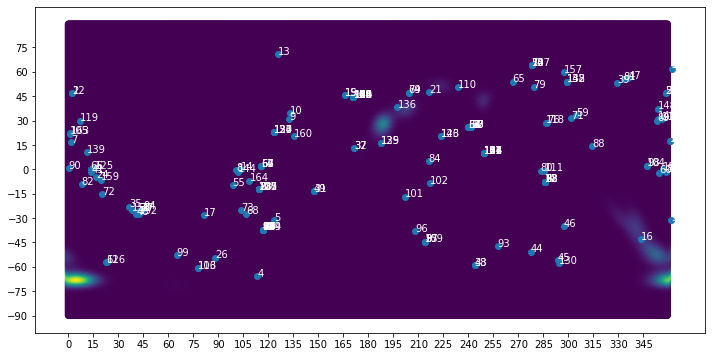

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
probmap = pd.read_csv('probmap.csv')

df = pd.DataFrame()
file = open('data.txt', 'r')
tids = []
oids = []
ras = []
decs = []
stimes = []
modes = []
for line in file.readlines():
    arr = line.split()
    tids.append(arr[0])
    oids.append(arr[1])
    ras.append(float(arr[2])*(15.) + float(arr[3])*(15./60.) + float(arr[4])*(15./360.))
    decs.append(float(arr[5]) + float(arr[6])/60. + float(arr[7])/360.)
    stimes.append(arr[8] + ' ' + arr[9])
    modes.append(arr[12])
df['targetid'] = tids
df['obsid'] = oids
df['ra'] = ras
df['dec'] = decs
df['start time'] = stimes
df['mode'] = modes
df = df[df['mode'] == 'PHOTON'].sort_values(by=['start time'])

fig, ax = plt.subplots(figsize=(12, 6))
# ax.set_facecolor('indigo')
ax.set_xticks(np.arange(0, 360, 15))
ax.set_yticks(np.arange(-90, 90, 15))
ax.scatter(probmap['ra'], probmap['dec'], c=probmap['prob'])
ax.scatter(df['ra'], df['dec'])
for i in np.arange(df.shape[0]):
    ax.annotate(i, (df['ra'].tolist()[i], df['dec'].tolist()[i]), color='white')

In [24]:
df.iloc[16]

targetid                    10883
obsid                 00010883085
ra                        343.688
dec                      -43.0294
start time    2019-05-20 05:30:52
mode                       PHOTON
Name: 125, dtype: object